Original number of features: 4
Number of features after LDA: 2



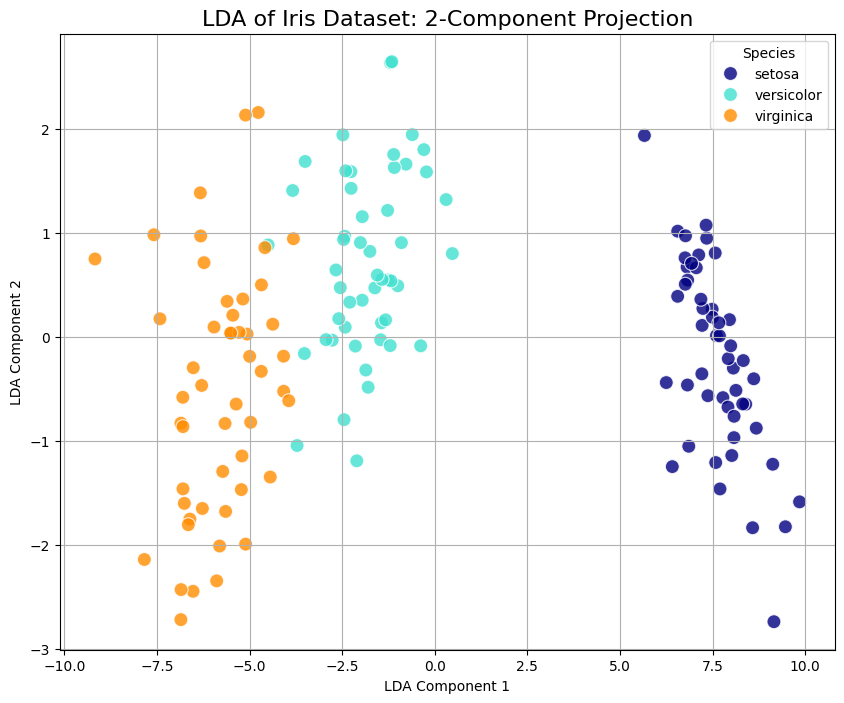

--- Plot Analysis ---
The scatter plot shows the projection of the Iris dataset onto the two most discriminative directions found by LDA.
As you can see from the plot:
- The 'setosa' class (navy) is perfectly separated from the other two classes.
- The 'versicolor' (turquoise) and 'virginica' (darkorange) classes are also well-separated, with only a minor overlap.
This visualization demonstrates that LDA has successfully found a lower-dimensional representation of the data that preserves the class separability.


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# 1. Load the Iris dataset
# -------------------------
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print(f"Original number of features: {X.shape[1]}")


# 2. Apply LDA for dimensionality reduction
# -----------------------------------------
# Initialize LDA and set the number of components to 2
# We choose 2 components because we want to visualize the data on a 2D plot.
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the model and transform the data
# We fit on the entire dataset (X, y) because the goal is visualization, not prediction.
X_r2 = lda.fit(X, y).transform(X)

print(f"Number of features after LDA: {X_r2.shape[1]}\n")


# 3. Create a scatter plot of the transformed data
# ------------------------------------------------
# For easier plotting, let's put the transformed data into a pandas DataFrame
df = pd.DataFrame(data=X_r2, columns=['LDA Component 1', 'LDA Component 2'])
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


# Create the scatter plot using seaborn for a nice aesthetic
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='LDA Component 1',
    y='LDA Component 2',
    hue='species_name',
    palette=['navy', 'turquoise', 'darkorange'],
    data=df,
    s=100, # s is the marker size
    alpha=0.8
)

plt.title('LDA of Iris Dataset: 2-Component Projection', fontsize=16)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Species')
plt.grid(True)
plt.show()


# 4. Analyze the plot (Explanation)
# ---------------------------------
print("--- Plot Analysis ---")
print("The scatter plot shows the projection of the Iris dataset onto the two most discriminative directions found by LDA.")
print("As you can see from the plot:")
print("- The 'setosa' class (navy) is perfectly separated from the other two classes.")
print("- The 'versicolor' (turquoise) and 'virginica' (darkorange) classes are also well-separated, with only a minor overlap.")
print("This visualization demonstrates that LDA has successfully found a lower-dimensional representation of the data that preserves the class separability.")

--- Dataset Head ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline 

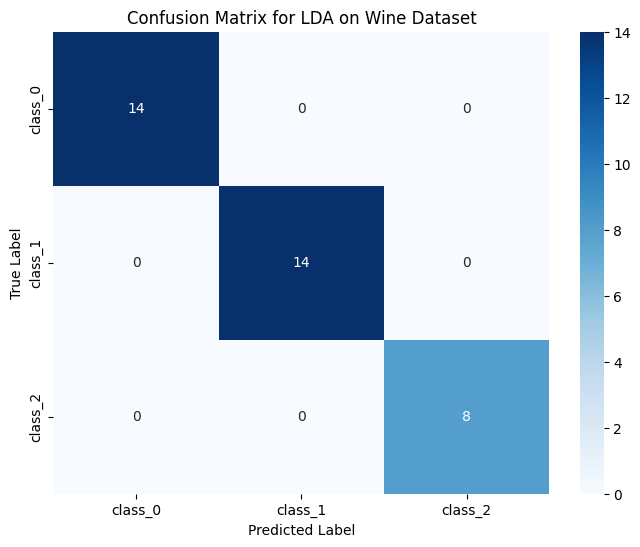

In [2]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load and prepare the data
# -----------------------------
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for better visualization (optional but good practice)
df = pd.DataFrame(X, columns=wine.feature_names)
df['class'] = y

print("--- Dataset Head ---")
print(df.head())
print("\n")


# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}\n")


# 2. Train an LDA model
# ----------------------
# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(X_train, y_train)
print("LDA model trained successfully.\n")


# 3. Make predictions
# --------------------
# Use the trained model to predict classes for the test set
y_pred = lda.predict(X_test)


# 4. Evaluate the model's performance
# ------------------------------------
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Evaluation ---")
print(f"Accuracy of the LDA model: {accuracy:.4f}") # Using .4f for nice formatting


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


# Visualize the confusion matrix for a clearer report
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LDA on Wine Dataset')
plt.show()